In [1]:
!pip install visual-automata

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 787.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 2.6 MB/s eta 0:00:00
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=23c65cb35f60af5ca799545654690aedb7e6a1f

In [2]:
from visual_automata.fa.dfa import VisualDFA
import re

In [4]:
with open("brown_nouns.txt", "r") as f:
    nouns = [line.strip().lower() for line in f if line.strip()]

print(f"Loaded {len(nouns)} nouns. Sample:", nouns[:10])

Loaded 16814 nouns. Sample: ['investigation primary election evidence irregularities place jury presentments charge election', 'praise thanks manner election term jury reports irregularities primary handful reports jury', 'interest election number voters size city jury registration election laws legislators laws end jury', 'number topics departments practices interest governments jury offices efficiency cost', 'administration jury personnel result city personnel policies city steps problem implementation', 'automobile title law jury funds date implementation law jury swipe handling funds child welfare', 'services homes items assistance program jury funds welfare departments counties state', 'exception money jurors distribution funds program counties future portion funds jurors failure', 'burden taxpayers jury court fire practices appointment appraisers guardians administrators', 'awarding fees compensation jury court procedures recommendations juries interim citizens']


In [5]:
def analyze_word(word):
    if re.match(r".*(s|x|z|ch|sh)es$", word):
        root = re.sub(r"es$", "", word)
        return f"{root}+N+PL"

    if re.match(r".*ies$", word):
        root = re.sub(r"ies$", "y", word)
        return f"{root}+N+PL"

    if re.match(r".+s$", word) and not re.match(r".*(ss|us|is)$", word):
        root = re.sub(r"s$", "", word)
        return f"{root}+N+PL"

    if word in nouns:
        return f"{word}+N+SG"

    return "Invalid Word"


In [6]:
results = {}
for noun in nouns:
    results[noun] = analyze_word(noun)

for k, v in list(results.items())[:10]:
    print(f"{k} : {v}")

investigation primary election evidence irregularities place jury presentments charge election : investigation primary election evidence irregularities place jury presentments charge election+N+SG
praise thanks manner election term jury reports irregularities primary handful reports jury : praise thanks manner election term jury reports irregularities primary handful reports jury+N+SG
interest election number voters size city jury registration election laws legislators laws end jury : interest election number voters size city jury registration election laws legislators laws end jury+N+SG
number topics departments practices interest governments jury offices efficiency cost : number topics departments practices interest governments jury offices efficiency cost+N+SG
administration jury personnel result city personnel policies city steps problem implementation : administration jury personnel result city personnel policies city steps problem implementation+N+SG
automobile title law jury fun

In [7]:
output_file = "noun_analysis_output.txt"
with open(output_file, "w") as f:
    for word, analysis in results.items():
        f.write(f"{word} : {analysis}\n")

print(f"Results saved to {output_file}")

Results saved to noun_analysis_output.txt


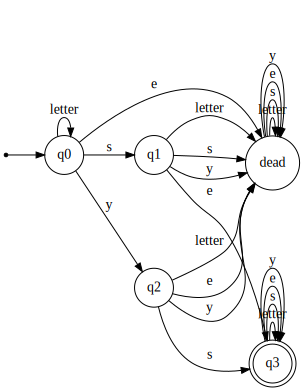

In [8]:
from visual_automata.fa.dfa import VisualDFA

states = {"q0", "q1", "q2", "q3", "dead"}
input_symbols = {"letter", "s", "e", "y"}

transitions = {
    "q0": {"letter": "q0", "s": "q1", "e": "dead", "y": "q2"},
    "q1": {"letter": "dead", "s": "dead", "e": "q3", "y": "dead"},
    "q2": {"letter": "dead", "s": "q3", "e": "dead", "y": "dead"},
    "q3": {"letter": "q3", "s": "q3", "e": "q3", "y": "q3"},
    "dead": {"letter": "dead", "s": "dead", "e": "dead", "y": "dead"}
}

dfa = VisualDFA(
    states=states,
    input_symbols=input_symbols,
    transitions=transitions,
    initial_state="q0",
    final_states={"q3"}
)

dfa.show_diagram(filename="fst_dfa.png", input_str="")